In [1]:
%load_ext autoreload
%autoreload 2
import ziff.ziff 

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("test")

01:31:10 INFO:test


In [4]:
#img = '/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c08_o_q3_sciimg.fits'
img = '/Users/graziani/temp/ztf_20190917468333_000698_zi_c03_o_q2_sciimg.fits'

In [5]:
z = ziff.ziff.Ziff(img,logger=logger,build_default_cat = False, load_default_cat = True)
_ = z.get_ztfimg()[0].show()
fig = _.get_figure()
fig.savefig('../examples/figures/sciimg.png')

FileNotFoundError: /Users/graziani/temp/ztf_20190917468333_000698_zi_c03_o_q2_sciimg.fits does not exist.

In [ ]:
z.set_config_value('i/o,nstars',2000)
z.set_config_value('psf,interp,order',4)
z.set_config_value('psf,outliers,max_remove',20)

In [ ]:
z.run_piff('gaia_calibration',overwrite_cat=True)

In [ ]:
z.psf

In [ ]:
z.set_config_value('i/o,nstars',10000)
stars = z.make_stars('gaia_full',overwrite_cat=True)
new_stars = z.reflux_stars(stars,fit_center=False, use_minuit=False)
res = z.compute_residuals(new_stars,normed=True,sky=200)
shapes = z.compute_shapes(new_stars)


<IPython.core.display.Javascript object>


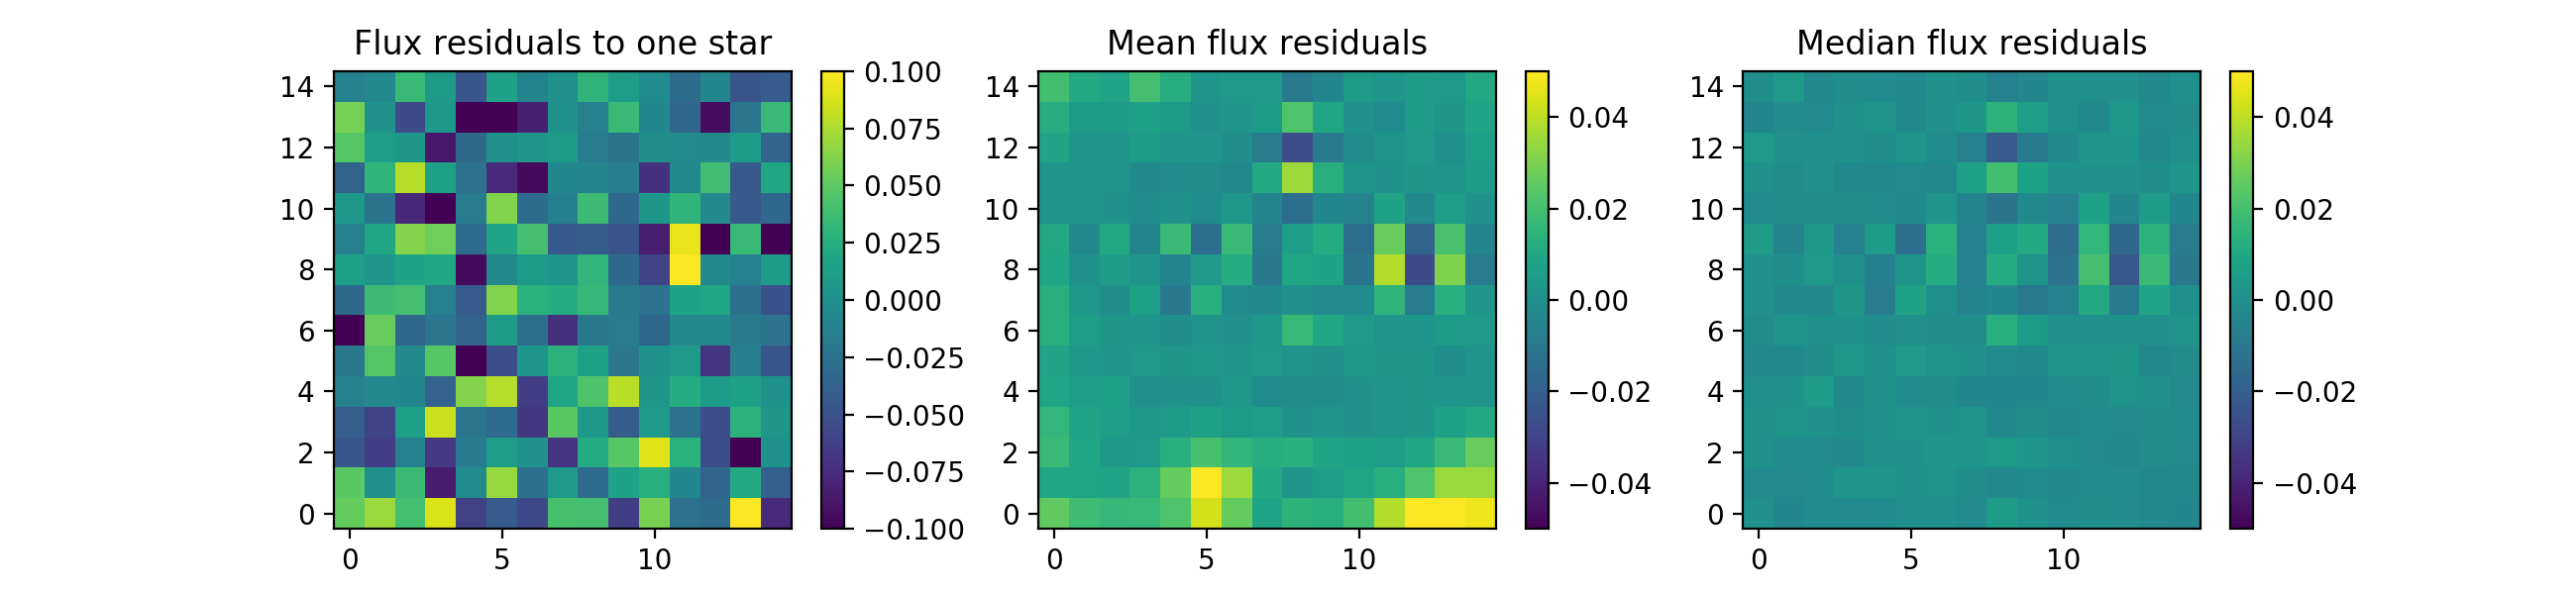

In [43]:
import numpy as np
import matplotlib.pyplot as P
fig, axes = P.subplots(1,3,figsize=(13,3))
im_kwargs  = {'origin':'lower', 'vmin' : -0.1, 'vmax': 0.1}
i = axes[0].imshow(res[0].T, **im_kwargs)
fig.colorbar(i,ax=axes[0])
axes[0].set_title('Flux residuals to one star')
im_kwargs  = {'origin':'lower', 'vmin' : -0.05, 'vmax': 0.05}
axes[1].set_title('Mean flux residuals')
i = axes[1].imshow(np.mean(res,axis=0).T, **im_kwargs)
fig.colorbar(i,ax=axes[1])

axes[2].set_title('Median flux residuals')
i = axes[2].imshow(np.median(res,axis=0).T, **im_kwargs)
fig.colorbar(i,ax=axes[2])
fig.savefig('../examples/figures/residuals.png')


<IPython.core.display.Javascript object>


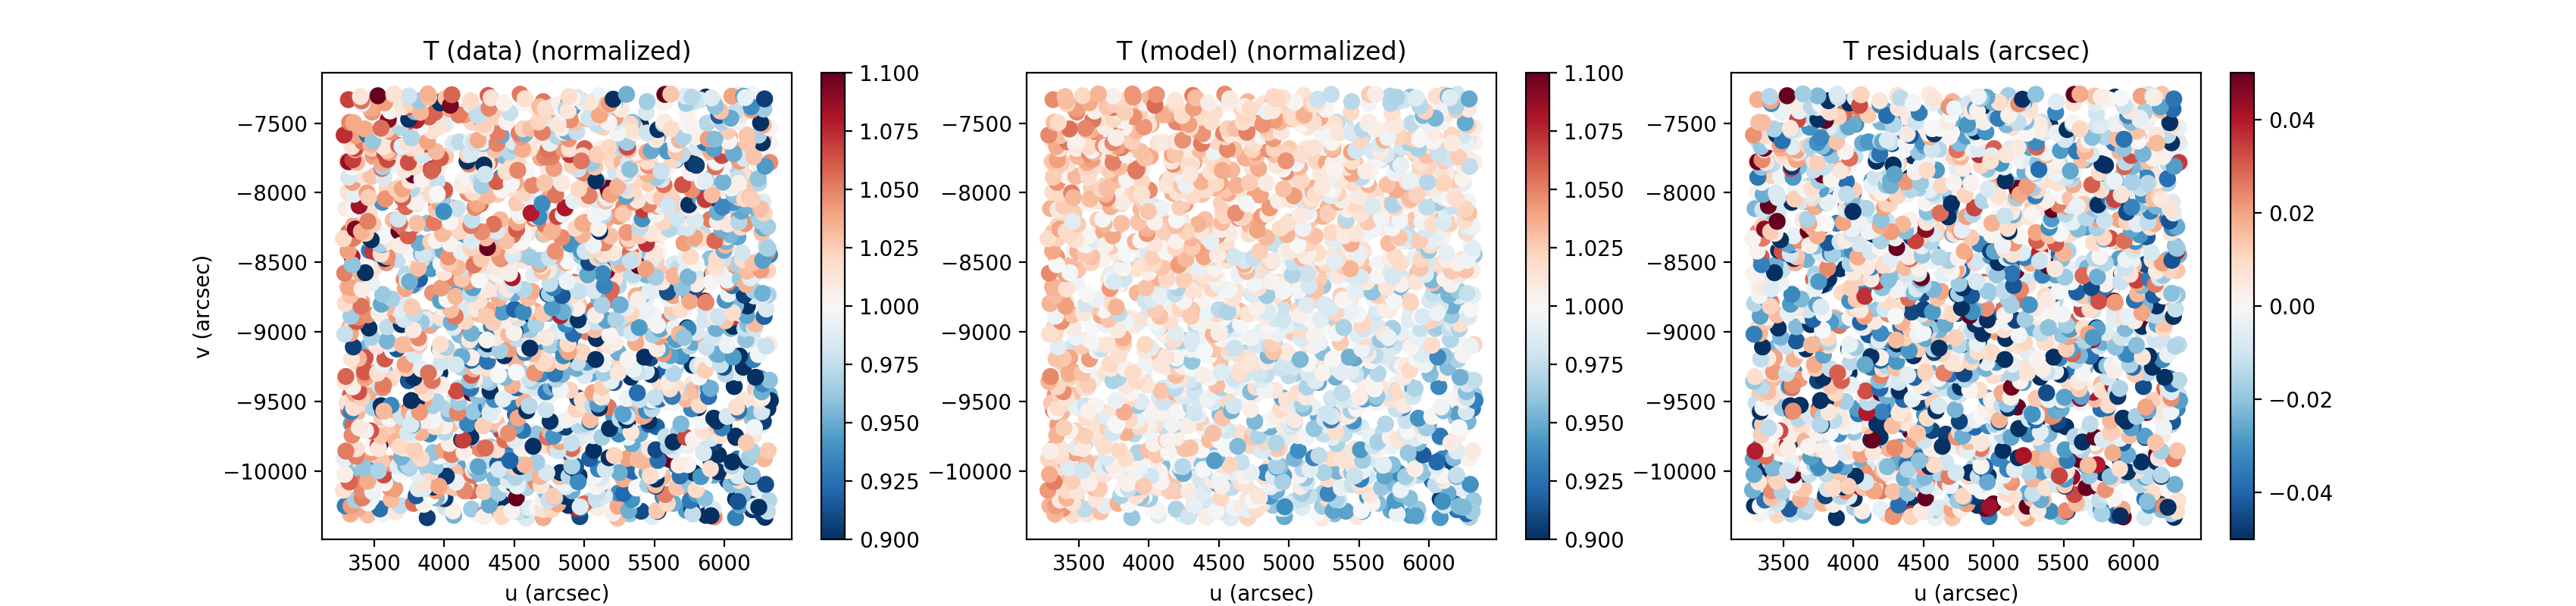

In [59]:
fig, axes = P.subplots(1,3,figsize=(17,4))
scat_kwargs = {'cmap':'RdBu_r', 's':50}

s = axes[0].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data_normalized']),vmin=0.9,vmax=1.1,**scat_kwargs)
axes[0].set_title('T (data) (normalized)')
axes[0].set_xlabel('u (arcsec)')
axes[0].set_ylabel('v (arcsec)')

fig.colorbar(s,ax=axes[0])

s = axes[1].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_model_normalized']),vmin=0.9,vmax=1.1,**scat_kwargs)
axes[1].set_xlabel('u (arcsec)')
axes[1].set_title('T (model) (normalized)')
fig.colorbar(s,ax=axes[1])


s = axes[2].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data'])-np.asarray(shapes['T_model']),vmin=-0.05,vmax=0.05,**scat_kwargs)
axes[2].set_xlabel('u (arcsec)')
axes[2].set_title('T residuals (arcsec)')
fig.colorbar(s,ax=axes[2])

fig.savefig('../examples/figures/Tresiduals.png')

[0.   0.25 0.5  0.75 1.  ]


<IPython.core.display.Javascript object>


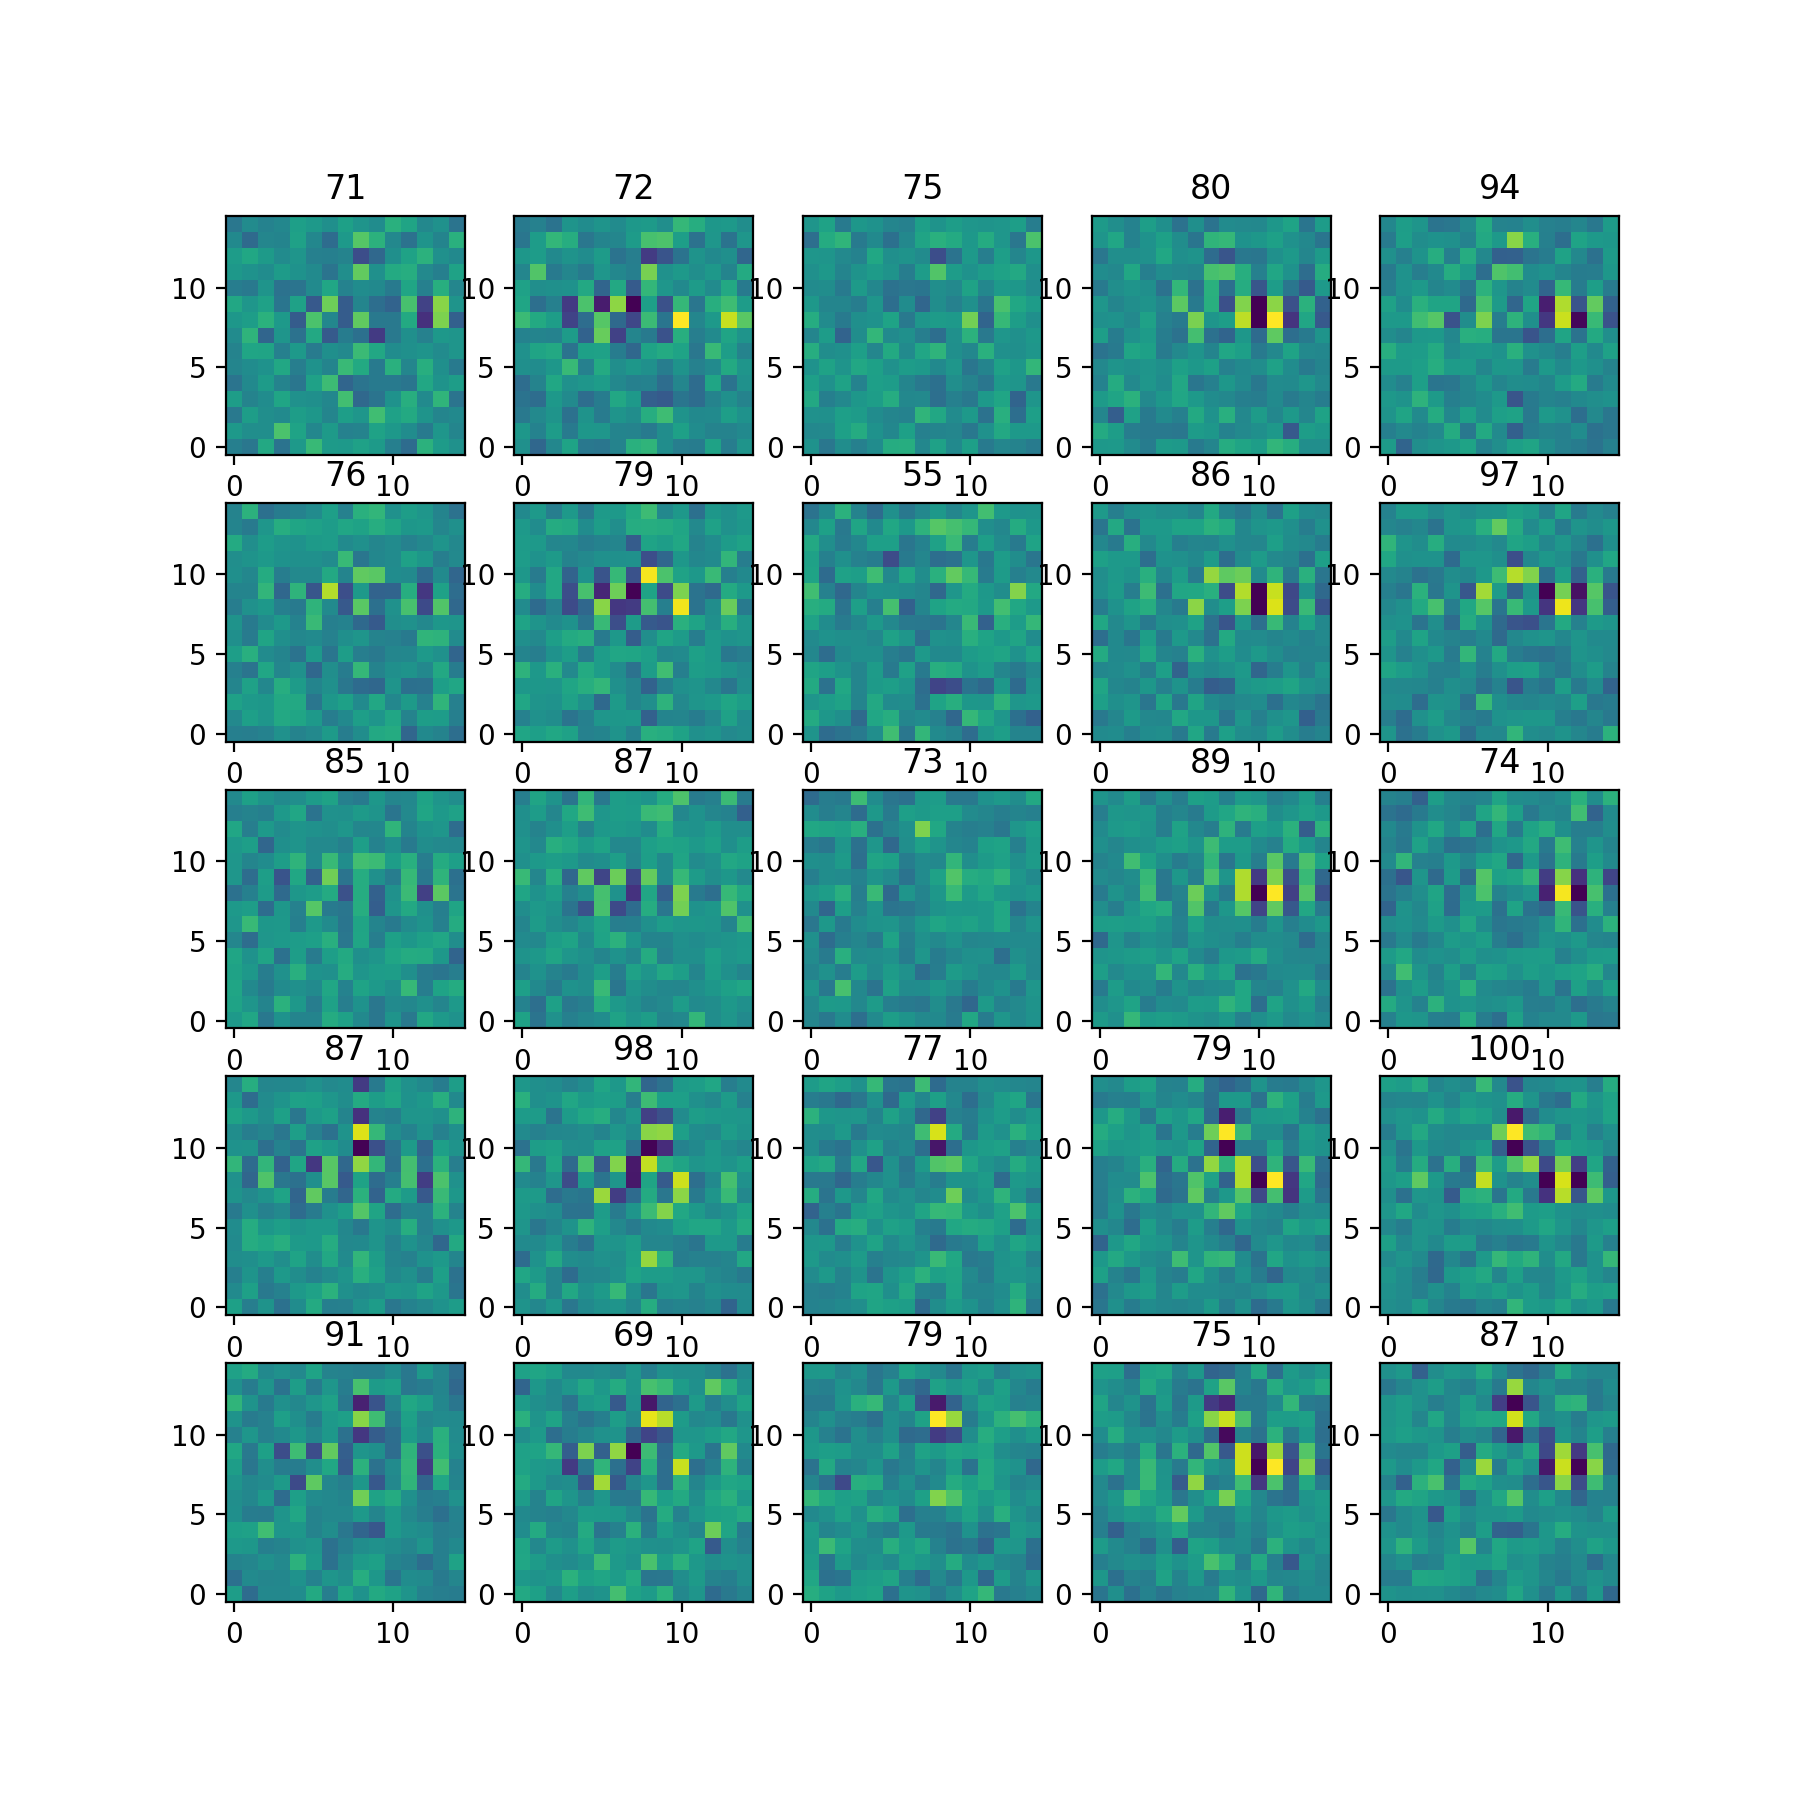

In [55]:
# BINNED BY POSITION

x = N.stack([float(s.x+0*s.center_to_offset(s.center)[0])%1 for s in new_stars])
y = N.stack([float(s.y+0*s.center_to_offset(s.center)[1])%1 for s in new_stars])


from scipy.stats import binned_statistic_2d
nbins = 5
bins = N.linspace(0.,1.,nbins)
print(bins)
hist = binned_statistic_2d(x = x, y = y, values = res.reshape((N.size(res,axis=0),-1)).T,bins=nbins,statistic='median',expand_binnumbers=True)
fig, axes = P.subplots(nbins,nbins,figsize=(9,9))
hr = hist[0].reshape((res.shape[1],res.shape[2],nbins,nbins))
for i in range(nbins):
    for j in range(nbins):
        axes[i,j].imshow(hr[...,i,j].T,vmin=-0.05,vmax=0.05,origin='lower')
        axes[i,j].set_title("{}".format(N.size(N.where((hist[-1][0]==i+1) * (hist[-1][1]==j+1)))))
        
        

# PER CCD

In [63]:
imgs = ['/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q{}_sciimg.fits'.format(i+1) for i in range(4)]
z = ziff.ziff.Ziff(imgs,logger=logger,load_default_cat= False, build_default_cat = True)
z.set_config_value('i/o,nstars',1000)
z.set_config_value('psf,interp,order',5)
z.set_config_value('psf,outliers,max_remove',20)
z.run_piff('gaia_calibration',overwrite_cat=True)

Building default catalogs


03:30:24 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
03:30:24 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
03:30:24 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
03:30:24 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
03:30:26 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
03:30:26 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
03:30:26 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg

In [64]:
z.set_config_value('i/o,nstars',10000)
stars = z.make_stars('gaia_full',overwrite_cat=True)
new_stars = z.reflux_stars(stars,fit_center=False, use_minuit=False)
res = z.compute_residuals(new_stars,normed=True,sky=200)
shapes = z.compute_shapes(new_stars)


03:51:48 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
03:51:48 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
03:51:48 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
03:51:48 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
03:51:48 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
03:51:48 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_full.fits.
03:51:48 INFO:Processing catalog 0 with 459 stars
03:51:49 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_2019030148

Processing 1/2020
Processing 2/2020
Processing 3/2020
Processing 4/2020
Processing 5/2020
Processing 6/2020
Processing 7/2020
Processing 8/2020
Processing 9/2020
Processing 10/2020
Processing 11/2020
Processing 12/2020
Processing 13/2020
Processing 14/2020
Processing 15/2020
Processing 16/2020
Processing 17/2020
Processing 18/2020
Processing 19/2020
Processing 20/2020
Processing 21/2020
Processing 22/2020
Processing 23/2020
Processing 24/2020
Processing 25/2020
Processing 26/2020
Processing 27/2020
Processing 28/2020
Processing 29/2020
Processing 30/2020
Processing 31/2020
Processing 32/2020
Processing 33/2020
Processing 34/2020
Processing 35/2020
Processing 36/2020
Processing 37/2020
Processing 38/2020
Processing 39/2020
Processing 40/2020
Processing 41/2020
Processing 42/2020
Processing 43/2020
Processing 44/2020
Processing 45/2020
Processing 46/2020
Processing 47/2020
Processing 48/2020
Processing 49/2020
Processing 50/2020
Processing 51/2020
Processing 52/2020
Processing 53/2020
Pr

Processing 452/2020
Processing 453/2020
Processing 454/2020
Processing 455/2020
Processing 456/2020
Processing 457/2020
Processing 458/2020
Processing 459/2020
Processing 460/2020
Processing 461/2020
Processing 462/2020
Processing 463/2020
Processing 464/2020
Processing 465/2020
Processing 466/2020
Processing 467/2020
Processing 468/2020
Processing 469/2020
Processing 470/2020
Processing 471/2020
Processing 472/2020
Processing 473/2020
Processing 474/2020
Processing 475/2020
Processing 476/2020
Processing 477/2020
Processing 478/2020
Processing 479/2020
Processing 480/2020
Processing 481/2020
Processing 482/2020
Processing 483/2020
Processing 484/2020
Processing 485/2020
Processing 486/2020
Processing 487/2020
Processing 488/2020
Processing 489/2020
Processing 490/2020
Processing 491/2020
Processing 492/2020
Processing 493/2020
Processing 494/2020
Processing 495/2020
Processing 496/2020
Processing 497/2020
Processing 498/2020
Processing 499/2020
Processing 500/2020
Processing 501/2020


Processing 868/2020
Processing 869/2020
Processing 870/2020
Processing 871/2020
Processing 872/2020
Processing 873/2020
Processing 874/2020
Processing 875/2020
Processing 876/2020
Processing 877/2020
Processing 878/2020
Processing 879/2020
Processing 880/2020
Processing 881/2020
Processing 882/2020
Processing 883/2020
Processing 884/2020
Processing 885/2020
Processing 886/2020
Processing 887/2020
Processing 888/2020
Processing 889/2020
Processing 890/2020
Processing 891/2020
Processing 892/2020
Processing 893/2020
Processing 894/2020
Processing 895/2020
Processing 896/2020
Processing 897/2020
Processing 898/2020
Processing 899/2020
Processing 900/2020
Processing 901/2020
Processing 902/2020
Processing 903/2020
Processing 904/2020
Processing 905/2020
Processing 906/2020
Processing 907/2020
Processing 908/2020
Processing 909/2020
Processing 910/2020
Processing 911/2020
Processing 912/2020
Processing 913/2020
Processing 914/2020
Processing 915/2020
Processing 916/2020
Processing 917/2020


Processing 1286/2020
Processing 1287/2020
Processing 1288/2020
Processing 1289/2020
Processing 1290/2020
Processing 1291/2020
Processing 1292/2020
Processing 1293/2020
Processing 1294/2020
Processing 1295/2020
Processing 1296/2020
Processing 1297/2020
Processing 1298/2020
Processing 1299/2020
Processing 1300/2020
Processing 1301/2020
Processing 1302/2020
Processing 1303/2020
Processing 1304/2020
Processing 1305/2020
Processing 1306/2020
Processing 1307/2020
Processing 1308/2020
Processing 1309/2020
Processing 1310/2020
Processing 1311/2020
Processing 1312/2020
Processing 1313/2020
Processing 1314/2020
Processing 1315/2020
Processing 1316/2020
Processing 1317/2020
Processing 1318/2020
Processing 1319/2020
Processing 1320/2020
Processing 1321/2020
Processing 1322/2020
Processing 1323/2020
Processing 1324/2020
Processing 1325/2020
Processing 1326/2020
Processing 1327/2020
Processing 1328/2020
Processing 1329/2020
Processing 1330/2020
Processing 1331/2020
Processing 1332/2020
Processing 13

Processing 1718/2020
Processing 1719/2020
Processing 1720/2020
Processing 1721/2020
Processing 1722/2020
Processing 1723/2020
Processing 1724/2020
Processing 1725/2020
Processing 1726/2020
Processing 1727/2020
Processing 1728/2020
Processing 1729/2020
Processing 1730/2020
Processing 1731/2020
Processing 1732/2020
Processing 1733/2020
Processing 1734/2020
Processing 1735/2020
Processing 1736/2020
Processing 1737/2020
Processing 1738/2020
Processing 1739/2020
Processing 1740/2020
Processing 1741/2020
Processing 1742/2020
Processing 1743/2020
Processing 1744/2020
Processing 1745/2020
Processing 1746/2020
Processing 1747/2020
Processing 1748/2020
Processing 1749/2020
Processing 1750/2020
Processing 1751/2020
Processing 1752/2020
Processing 1753/2020
Processing 1754/2020
Processing 1755/2020
Processing 1756/2020
Processing 1757/2020
Processing 1758/2020
Processing 1759/2020
Processing 1760/2020
Processing 1761/2020
Processing 1762/2020
Processing 1763/2020
Processing 1764/2020
Processing 17

<IPython.core.display.Javascript object>


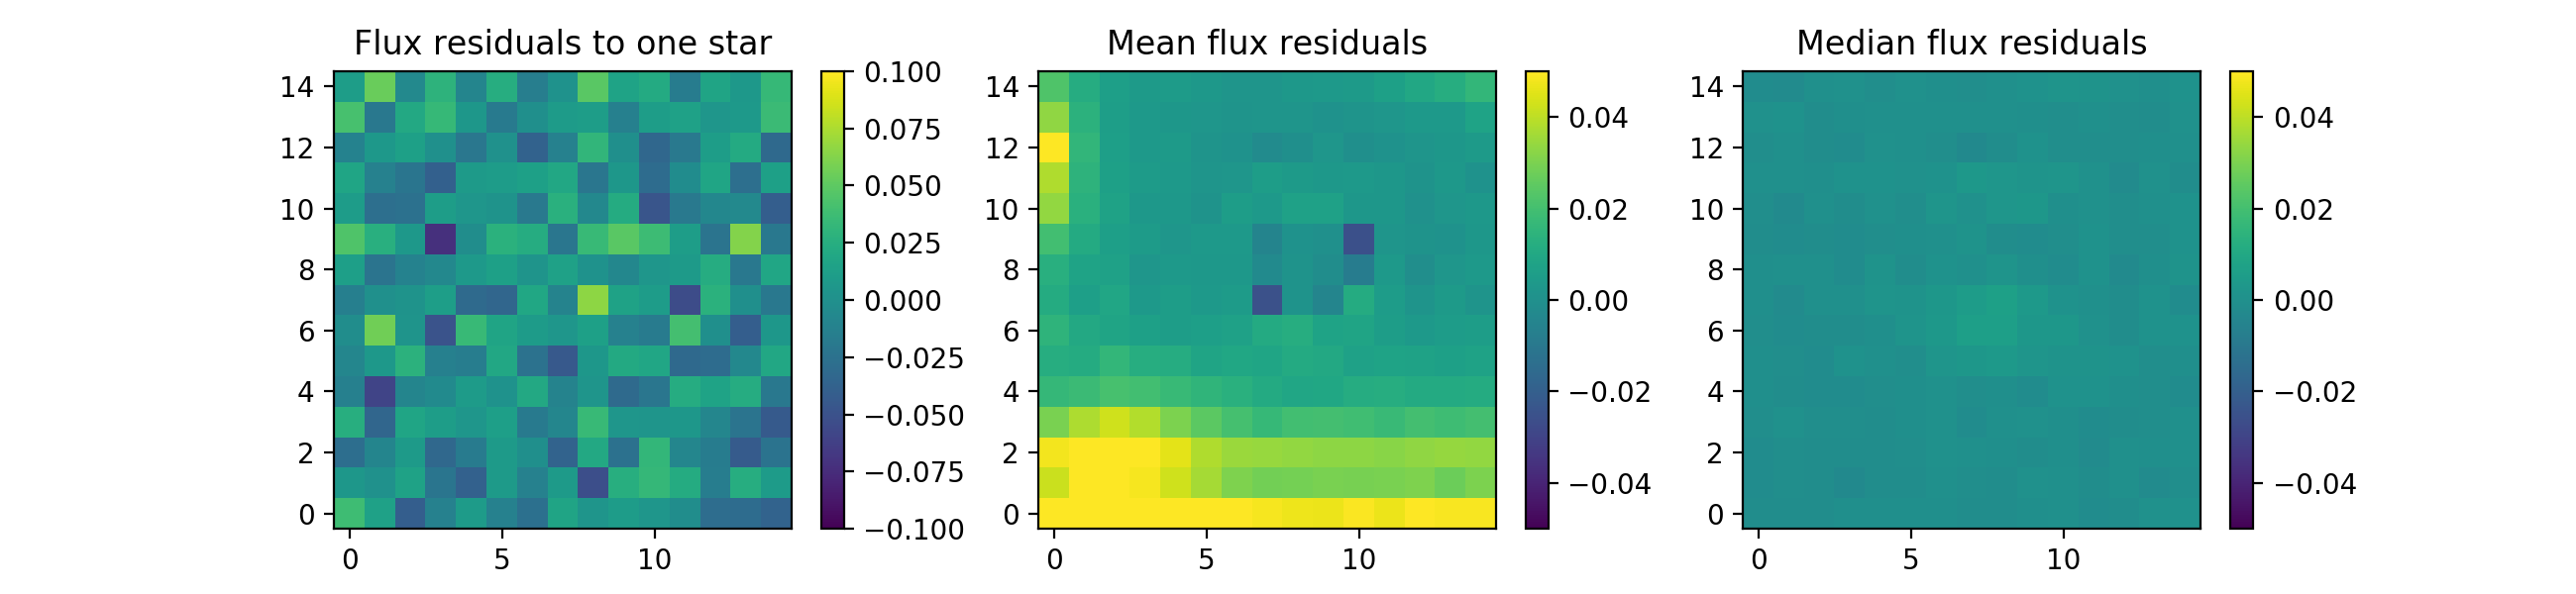

In [65]:
import numpy as np
import matplotlib.pyplot as P
fig, axes = P.subplots(1,3,figsize=(13,3))
im_kwargs  = {'origin':'lower', 'vmin' : -0.1, 'vmax': 0.1}
i = axes[0].imshow(res[0].T, **im_kwargs)
fig.colorbar(i,ax=axes[0])
axes[0].set_title('Flux residuals to one star')
im_kwargs  = {'origin':'lower', 'vmin' : -0.05, 'vmax': 0.05}
axes[1].set_title('Mean flux residuals')
i = axes[1].imshow(np.mean(res,axis=0).T, **im_kwargs)
fig.colorbar(i,ax=axes[1])

axes[2].set_title('Median flux residuals')
i = axes[2].imshow(np.median(res,axis=0).T, **im_kwargs)
fig.colorbar(i,ax=axes[2])
fig.savefig('../examples/figures/ccd_residuals.png')


<IPython.core.display.Javascript object>


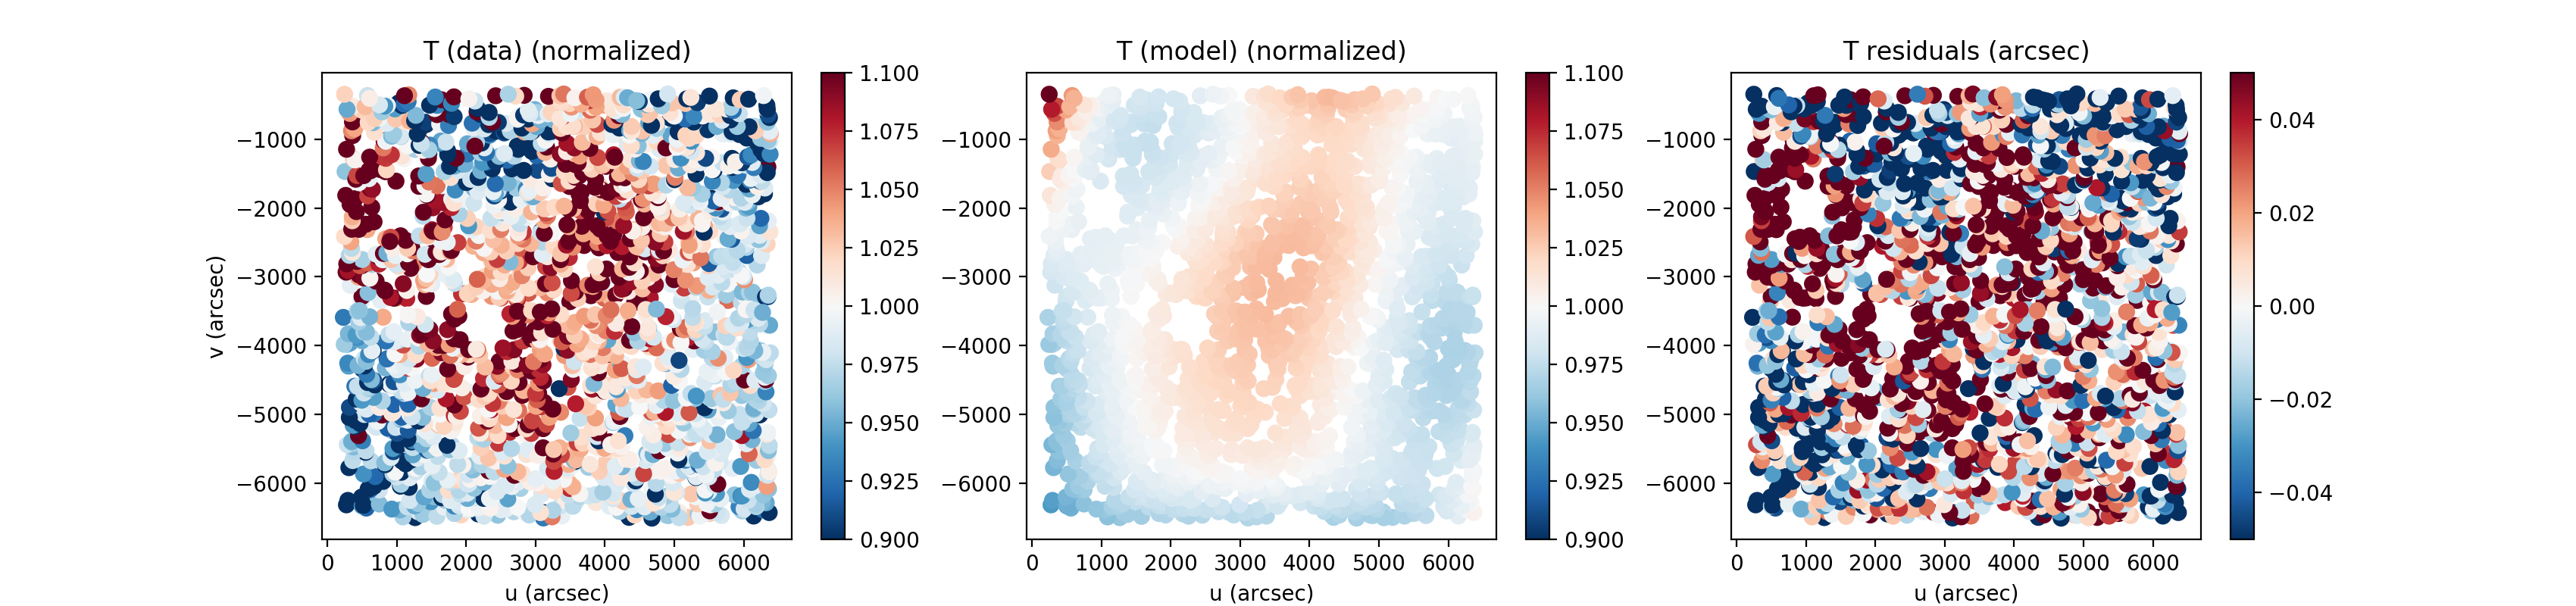

In [66]:
fig, axes = P.subplots(1,3,figsize=(17,4))
scat_kwargs = {'cmap':'RdBu_r', 's':50}

s = axes[0].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data_normalized']),vmin=0.9,vmax=1.1,**scat_kwargs)
axes[0].set_title('T (data) (normalized)')
axes[0].set_xlabel('u (arcsec)')
axes[0].set_ylabel('v (arcsec)')

fig.colorbar(s,ax=axes[0])

s = axes[1].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_model_normalized']),vmin=0.9,vmax=1.1,**scat_kwargs)
axes[1].set_xlabel('u (arcsec)')
axes[1].set_title('T (model) (normalized)')
fig.colorbar(s,ax=axes[1])


s = axes[2].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data'])-np.asarray(shapes['T_model']),vmin=-0.05,vmax=0.05,**scat_kwargs)
axes[2].set_xlabel('u (arcsec)')
axes[2].set_title('T residuals (arcsec)')
fig.colorbar(s,ax=axes[2])

fig.savefig('../examples/figures/ccd_Tresiduals.png')


In [3]:

DOWNLOAD = False
from ztfquery import query
zquery = query.ZTFQuery() 
zquery.load_metadata(sql_query = "ccdid=4 and fid=1 and obsjd BETWEEN 2458543.9 AND 2458544")
#zquery.load_metadata(sql_query = "qid=1 and fid=1 and filefracday=20190301480845")


In [5]:
z = ziff.ziff.ZiffCollection.from_zquery(zquery,['ccdid','filefracday'],build_default_cat = False, load_default_cat = False)


In [30]:
with open('testing.txt','w') as f:
    for ziff in z.ziffs:
        for (i,l0) in enumerate(ziff._sciimg):
            if i ==0 :
                f.write(l0)
            else:
                f.write(',' + l0)
        f.write('\n')

In [42]:
df = pd.read_csv('testing.txt',header=0,index_col=False,names=(0,1,2,3))
df.loc[0].values

array(['/Users/graziani/Data/ZTF/sci/2019/0301/481516/ztf_20190301481516_000530_zg_c04_o_q4_sciimg.fits',
       '/Users/graziani/Data/ZTF/sci/2019/0301/481516/ztf_20190301481516_000530_zg_c04_o_q2_sciimg.fits',
       '/Users/graziani/Data/ZTF/sci/2019/0301/481516/ztf_20190301481516_000530_zg_c04_o_q3_sciimg.fits',
       '/Users/graziani/Data/ZTF/sci/2019/0301/481516/ztf_20190301481516_000530_zg_c04_o_q1_sciimg.fits'],
      dtype=object)

In [55]:
import ziff.ziff
z = ziff.ziff.Ziff.from_file('testing.txt',row=10,build_default_cat = False, load_default_cat = False)

In [56]:
print(z._mskimg)

['/Users/graziani/Data/ZTF/sci/2019/0301/486863/ztf_20190301486863_000791_zg_c04_o_q3_mskimg.fits', '/Users/graziani/Data/ZTF/sci/2019/0301/486863/ztf_20190301486863_000791_zg_c04_o_q1_mskimg.fits', '/Users/graziani/Data/ZTF/sci/2019/0301/486863/ztf_20190301486863_000791_zg_c04_o_q2_mskimg.fits', '/Users/graziani/Data/ZTF/sci/2019/0301/486863/ztf_20190301486863_000791_zg_c04_o_q4_mskimg.fits']


In [57]:
ziff.ziff.__file__

'/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/ziff.py'

In [76]:
N.savez('test',**shapes)

In [77]:
N.load('test.npz')['T_data']

array([ 1.24689474,  1.28897674,  1.33036922,  1.15706957,  1.27659047,
        1.23634347,  1.29384166,  1.2623528 ,  1.29854489,  1.26509485,
        1.48650652,  1.26060563,  1.2546114 ,  1.25916529,  1.26858063,
        1.24489173,  1.34950832,  1.34775241,  1.26590312,  1.34718136,
        1.29814057,  1.4187598 ,  1.29940599,  1.26479864,  1.40830134,
        1.29281637,  1.28189434,  1.37495187,  1.29647367,  1.36383777,
        1.36410562,  1.28060225,  1.30552582,  1.34998007,  1.28136827,
        1.26454363,  1.32848814,  1.28561584,  1.32554889,  1.26284819,
        1.31255873,  1.47334248,  1.30119099,  1.29643341,  1.24746761,
        1.26246308,  1.30248621,  1.35915487,  1.31469694,  1.28296201,
        1.38553476,  1.30207118,  1.36816999,  1.30223016,  1.3102232 ,
        1.34768858,  1.3072745 ,  1.27212055,  1.31784218,  1.28671955,
        1.36973769,  1.32589669,  1.3238842 ,  1.46934772,  1.2709907 ,
        1.30728382,  1.22037106,  0.95600982,  1.31696824,  1.27